# Assignment 1: Wrangling and EDA
Kaitlin Luu

### Q1

In [420]:
# 1
import pandas as pd
import numpy as np

In [421]:
df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [422]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].isna().sum()

np.int64(0)

I chose to remove the commas in the Price column because the values were originally strings, and Python cannot turn strings with commas into numbers.

In [423]:
# 2
police = pd.read_csv('data/mn_police_use_of_force.csv')
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [424]:
police['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

The proportion of missing values is 0.76.

In [425]:
pd.crosstab(police['force_type'], police['subject_injury'], dropna=False)

subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [426]:
police['subject_injury'] = police['subject_injury'].fillna('Missing')
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [427]:
police[police['subject_injury']=='Missing']

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,Missing,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,Missing,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,Missing,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,Missing,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial


There are no apparent patterns in the data that is 'Missing' for subject injury.

In [428]:
# 3
metabric = pd.read_csv('data/metabric.csv')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [429]:
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace({
    '0:LIVING': 1,
    '1:DECEASED': 0
})
metabric.head()

C:\Users\kaitl\AppData\Local\Temp\ipykernel_100932\1793300970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace({


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [430]:
# 4
df['Review Scores Rating'].isna().sum()

np.int64(8323)

In [431]:
median = df['Review Scores Rating'].median()
df['Review_Scores_Rating_Imputed'] = df['Review Scores Rating'].fillna(median)
df['Review_Scores_Rating_Imputed'].head()

0    94.0
1    94.0
2    94.0
3    94.0
4    96.0
Name: Review_Scores_Rating_Imputed, dtype: float64

This could bias the results because we are replacing missing data with the median of the non-missing data. This misrepresents the numbers because the real data could actually vary, but there are now a lot of values that are the same.

### Q2

In [432]:
# 1
! pip install xlrd

sharks = pd.read_excel('GSAF5.xls', engine='xlrd')
sharks.head()


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
# 2
sharks2 = sharks.dropna(axis=1, how='any')
sharks2.head()

,Date
0,20th January
1,19th January
2,19th January
3,18th January
4,10th January


#3. An observation is a single case in the data, which is represented by a single row in a dataset. In this dataset, an observation is one shark attack incident. This affects cleaning and analyzing because we do not drop entire rows since this can affects statistics like the mean and median. 

In [434]:
# 4
sharks["Year"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks["Year"] = sharks["Year"].replace(0, pd.NA)
sharks["Year"] = sharks["Year"].astype("Int64")
sharks["Year"].head()

0    2026
1    2026
2    2026
3    2026
4    2026
Name: Year, dtype: Int64

In [435]:
sharks["Year"].min(), sharks["Year"].max()

(np.int64(5), np.int64(2026))

The range of years is 5 to 2026. 

In [436]:
sharks_1940 = sharks[sharks["Year"] >= 1940]
per_year = sharks_1940.groupby("Year").size()
per_year.head(), per_year.tail()

(Year
 1940    24
 1941    27
 1942    41
 1943    28
 1944    31
 dtype: int64,
 Year
 2022     98
 2023    109
 2024     52
 2025     66
 2026      8
 dtype: int64)

Attacks seem to be increasing over time.

In [437]:
# 5
sharks["Age"] = pd.to_numeric(sharks["Age"], errors="coerce")
sharks["Age"].isna().sum()

np.int64(3147)

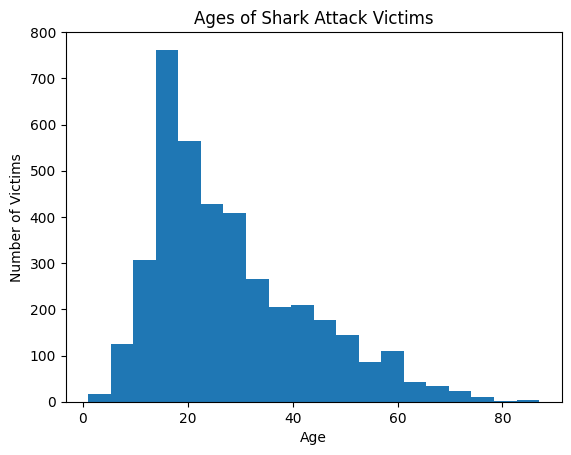

In [438]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(sharks["Age"].dropna(), bins=20)
plt.title("Ages of Shark Attack Victims")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()

In [439]:
# 6
sharks['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'unprovoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [440]:
sharks["Type"] = sharks["Type"].str.strip().str.capitalize()
sharks.loc[~sharks["Type"].isin(["Unprovoked", "Provoked"]), "Type"] = "Unknown"
sharks["Type"].value_counts()

Type
Unprovoked    5222
Unknown       1204
Provoked       644
Name: count, dtype: int64

The proportion of unprovoked attacks is 0.74.

In [441]:
# 7 - Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
sharks['Fatal Y/N'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [442]:
sharks["Fatal Y/N"] = sharks["Fatal Y/N"].str.strip().str.capitalize()
sharks.loc[~sharks["Fatal Y/N"].isin(["Y", "N"]), "Fatal Y/N"] = "Unknown"
sharks["Fatal Y/N"].value_counts()

Fatal Y/N
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64

In [443]:
fatal_by_type = pd.crosstab(sharks["Type"], sharks["Fatal Y/N"])
fatal_by_type

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,614,9,21
Unknown,449,555,200
Unprovoked,3876,79,1267


#8. The attack is more likely to be fatal when it is unprovoked. I feel like this makes sense because when if it was unprovoked, the sharks were likely actively looking for prey.

### Q3

1. This paper is about data tidying, which is an important aspect of data cleaning that makes a dataset easier to work with. A simple framework is provided to develop tidy tools for data analysis.

2. The tidy data standard aims to facilitate initial exploration and analysis of data, and to simplify the development of analysis tools that work well together.

1. The first sentence implies that different datasets have different aspects that make them "messy". The second sentence says that it is easy to distinguish observations from variables, but neither of these have exact definitions that can applied to all datasets because data comes in many different forms depending on what is measured. 

4. Wickham defines values as the numbers or strings that make up a dataset. Each value belongs to a variable and an observation. Variables contain all the values that measure the same underlying attribute across units. Observations contain all values measured on the same unit across attributes. 

5. "Tidy data" is defined as a standard way of mapping the meaning of a dataset to its structure. In tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. The five most common problems with messy datasets are:
* column headers are values, not variable names
* multiple variables are stored in one column
* variables are stored in both rows and columns
* multiple types of observational units are stored in the same table
* a single observational unit is stored in multiple tables
The data in Table 4 is messy because the variables form both the rows and columns, and column headers are values, not variable names. "Melting" a dataset means turning the columns into rows.

7. Table 11 is messy because each day of the month is a column rather than a row. This creates a lot of blank spaces in the table that looks like missing data. Table 12 is tidy and "molten" because there is one variable in each column, and each row represents a day's observations. 

### Q4

In [444]:
# 1
gifts = pd.read_csv('data/ForeignGifts_edu.csv')
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


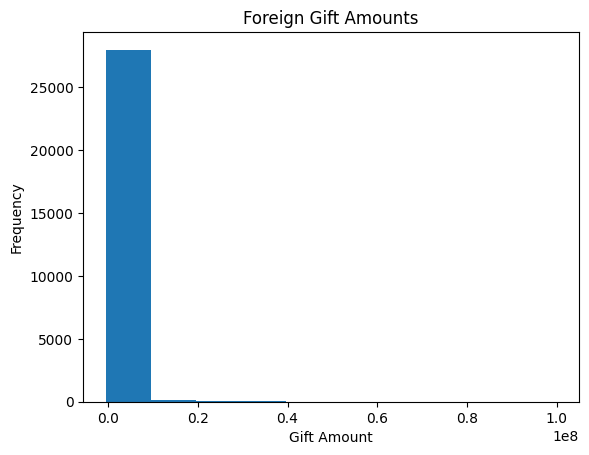

In [445]:
# 2
plt.figure()
plt.hist(gifts["Foreign Gift Amount"])
plt.xlabel('Gift Amount')
plt.ylabel('Frequency')
plt.title("Foreign Gift Amounts")
plt.show()

In [446]:
gifts["Foreign Gift Amount"].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

The variable Foreign Gift Amount has a mean of 588232.7, a min of -537770, and a max of 100000000. As we can see from the histogram, the data is very skewed. The vast majority of gift amounts were near the lower end of the range of data. There is a small number of negative amounts, which likely indicates refunds or corrections to entries. 

In [447]:
# 3
gifts["Gift Type"].value_counts()

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Gift Type Proportions:
Contract = 0.61, Monetary Gift = 0.39, Real estate = 0.00039

In [448]:
# 4
top_gifts = (gifts.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False)).head(15)
top_gifts

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [449]:
top_amounts = (gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False)).head(15)
top_amounts

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [450]:
# 5
top_institutions = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top_institutions

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

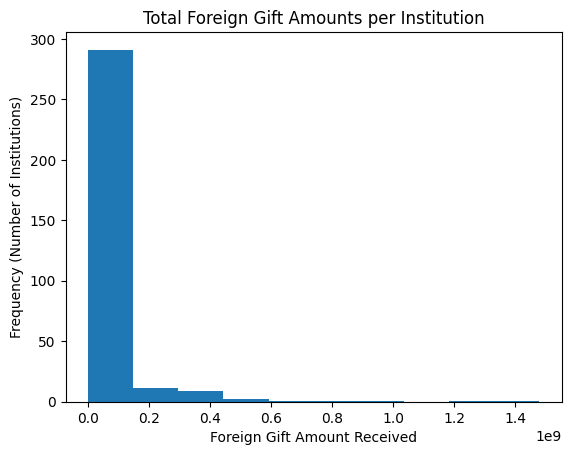

In [451]:
totals = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure()
plt.hist(totals)
plt.xlabel('Foreign Gift Amount Received')
plt.ylabel('Frequency (Number of Institutions)')
plt.title('Total Foreign Gift Amounts per Institution')
plt.show()

In [452]:
# 6
top_giftors = (gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)).head(15)
top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

### Q5

In [453]:
# 1
college = pd.read_csv('data/college_completion.csv')

In [454]:
# 2
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [455]:
college.shape

(3798, 63)

There are 3798 observations and 63 variables.

In [456]:
# 3
pd.crosstab(college['control'], college['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There are significantly more 4 year than 2 year private not-for-profit colleges. There are more 2 year than 4 year public colleges. There are around the same amount of 2 year and 4 year private for-profit colleges. 

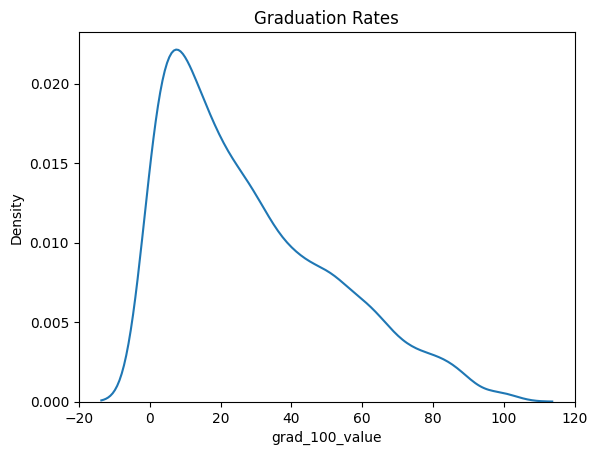

In [457]:
# 4
import seaborn as sns

plt.figure()
sns.kdeplot(college['grad_100_value'])
plt.title('Graduation Rates')
plt.show()


In [458]:
college['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

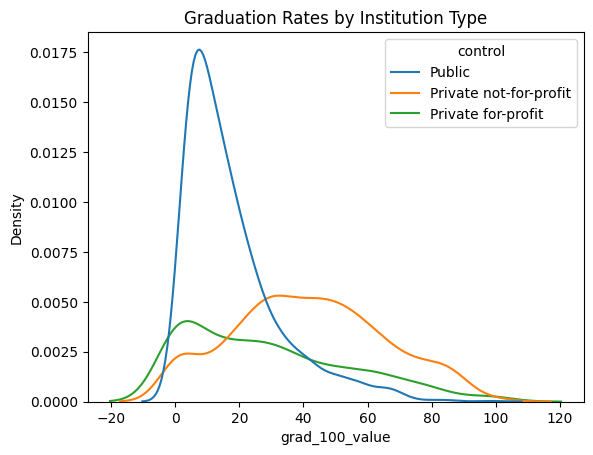

In [459]:
plt.figure()
sns.kdeplot(
    data = college[['grad_100_value','control']],
    x='grad_100_value',
    hue='control'
)
plt.title('Graduation Rates by Institution Type')
plt.show()

In [460]:
college[['grad_100_value','control']].groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Private not-for-profit institutions appear to have the most favorable graduation rates.

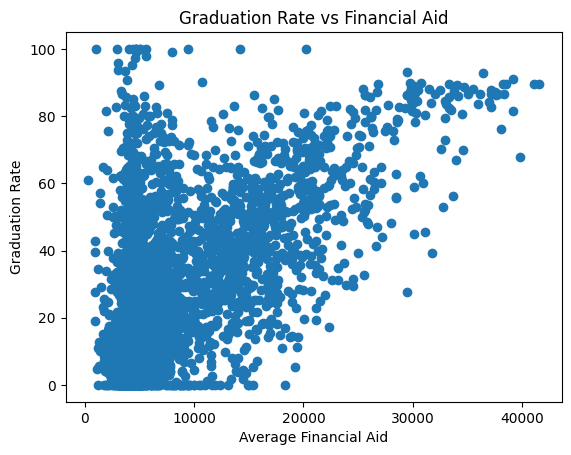

In [461]:
# 5
plt.figure()
plt.scatter(college['aid_value'], college['grad_100_value'])
plt.xlabel('Average Financial Aid')
plt.ylabel('Graduation Rate')
plt.title("Graduation Rate vs Financial Aid")
plt.show()


In [462]:
covariance = college['aid_value'].cov(college['grad_100_value'])
correlation = college['aid_value'].corr(college['grad_100_value'])
covariance, correlation

(np.float64(88610.48316902434), np.float64(0.5758792845936073))

Overall, there is a positive correlation between financial aid and graduation rate. However, there is a lot of data at the lower end of the range, meaning that the vast majority of institutions have small average financial aid packages and low graduation rates.

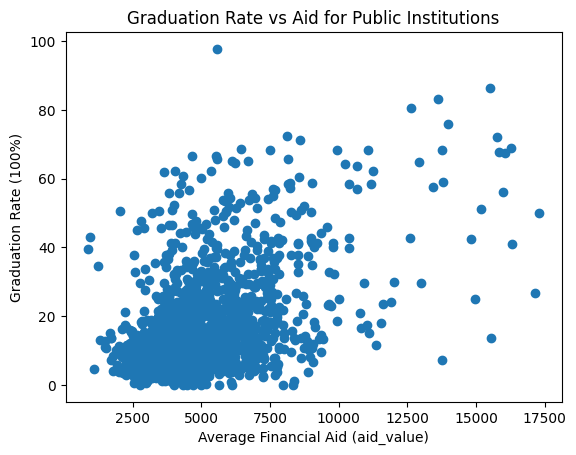

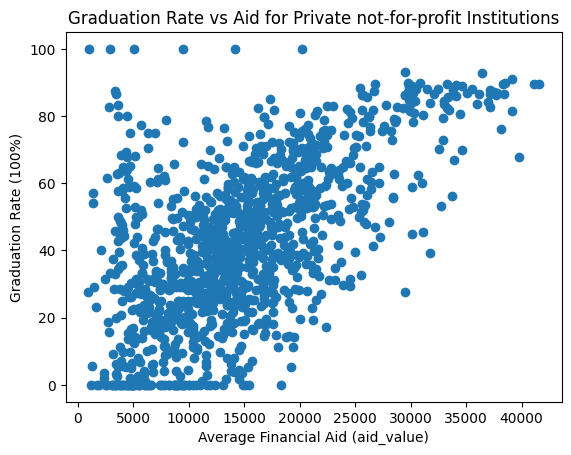

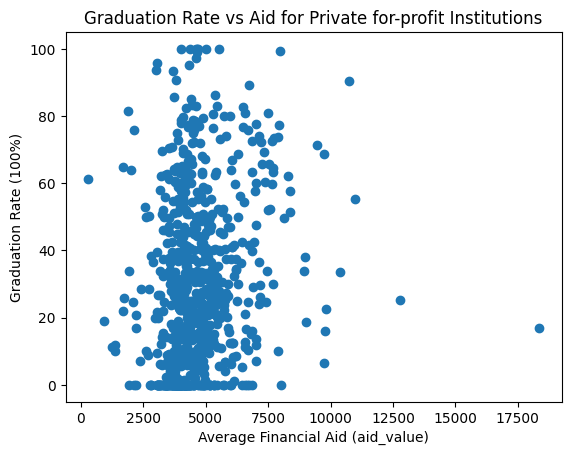

In [463]:
for c in college["control"].unique():
    subset = college[college["control"] == c][["aid_value", "grad_100_value"]]
    
    plt.figure()
    plt.scatter(subset["aid_value"], subset["grad_100_value"])
    plt.xlabel("Average Financial Aid (aid_value)")
    plt.ylabel("Graduation Rate (100%)")
    plt.title(f"Graduation Rate vs Aid for {c} Institutions")
    plt.show()

Financial aid varies positively with graduation rate for private not-for-profit institutions. There is a slight positive correlation for public institutions, and there is almost no correlation for private for-profit institutions. 

### Q6

For answers to Q6, please view the two images in the repo titled "Question 6 page 1" and "Question 6 page 2".

### Q7

In [464]:
# 1
ames = pd.read_csv('data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


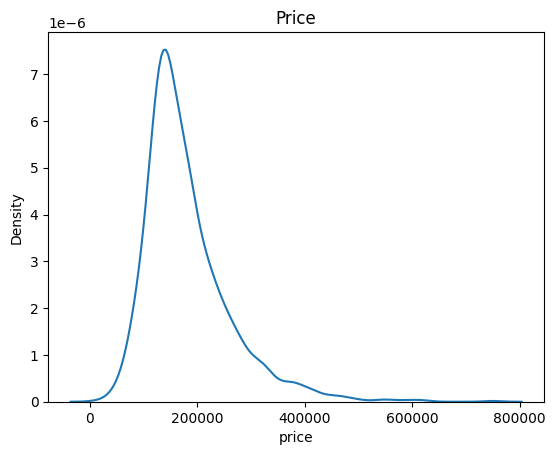

In [465]:
# 2 
sns.kdeplot(ames['price'])
plt.title('Price')
plt.show()

In [466]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

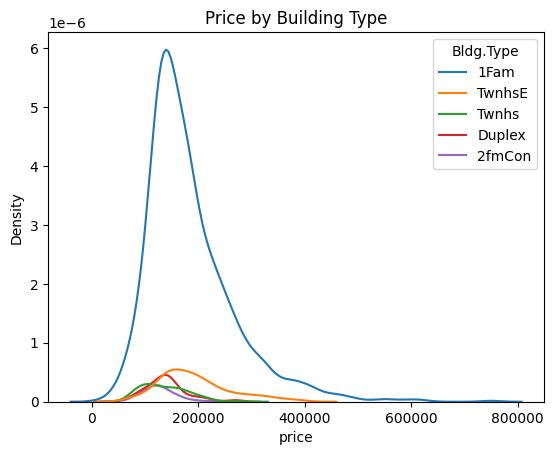

In [479]:
sns.kdeplot(data=ames, x='price', hue='Bldg.Type' )
plt.title('Price by Building Type')
plt.show()

In [468]:
ames.groupby('Bldg.Type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [469]:
ames.groupby("Bldg.Type")["price"].var()

Bldg.Type
1Fam      6.859451e+09
2fmCon    9.665408e+08
Duplex    1.560169e+09
Twnhs     1.758874e+09
TwnhsE    4.381346e+09
Name: price, dtype: float64

End-of-unit townhouses are the most expensive, on average. Single family homes have the highest variance in transaction prices.

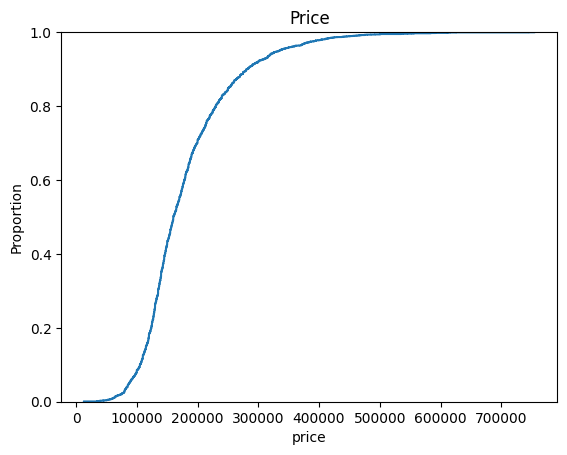

In [480]:
# 3
sns.ecdfplot(ames['price'])
plt.title('Price')
plt.show()

In [471]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

Minimum = 12789
.25 quantile = 129500
Median = 160000
.75 quantile = 213500
Maximum = 755000

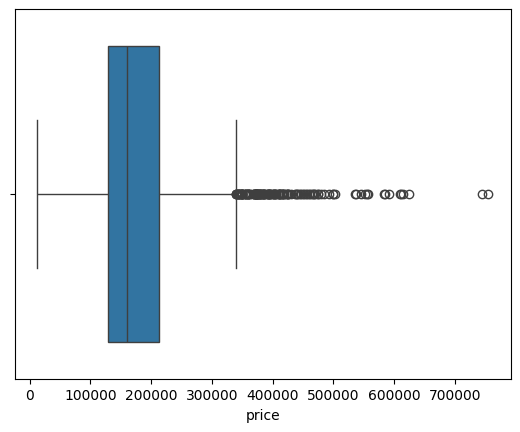

In [482]:
# 4
sns.boxplot(x=ames['price'])
plt.show()

Yes, there are outliers. All of them are on the higher end of the range of data.

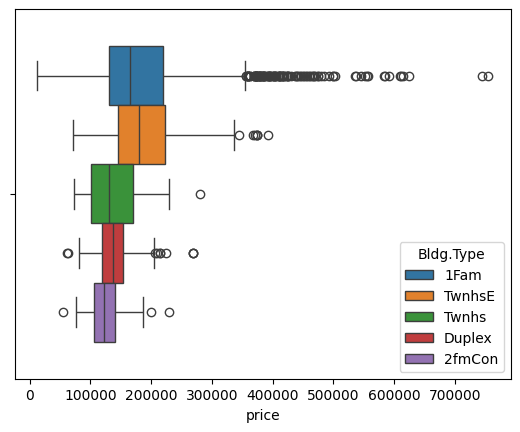

In [483]:
sns.boxplot(data=ames, x='price', hue='Bldg.Type' )
plt.show()

Single family homes have the most outliers by far. We have already established that their variance is the highest out of all the building types, and this is shown very clearly in this box plot by the large IQR and the many outliers. The building type with the lowest variance is the two-family conversion. 

In [474]:
# 5
Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [486]:
ames['price_outlier'] = ((ames['price'] < lower) | (ames['price'] > upper)).astype(int)
ames[['price', 'price_outlier']].head()

,price,price_outlier
0,215000,0
1,105000,0
2,172000,0
3,244000,0
4,189900,0


In [476]:
ames["price_outlier"].value_counts()

price_outlier
0    2793
1     137
Name: count, dtype: int64

In [477]:
# 6 - Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?
ames['price_winsorized'] = ames['price'].clip(lower=lower, upper=upper)
ames['price_winsorized'].describe()

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsorized, dtype: float64

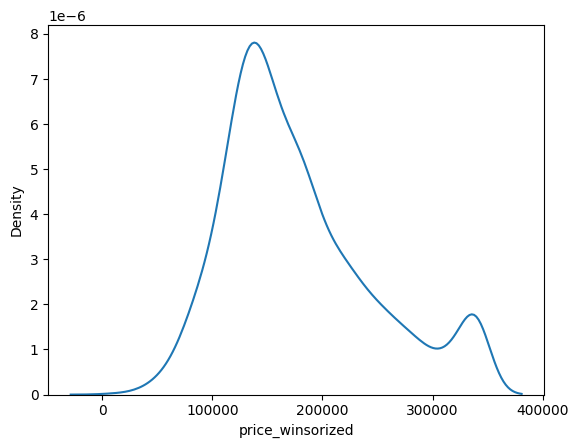

In [478]:
sns.kdeplot(ames['price_winsorized'])
plt.show()

Winsoring the price variable replaced the outliers with the next closest non-outlier number. The maximum is not as extreme now. This makes the distribution less skewed, as shown by the graph. 